SARS-CoV-2 Data Science Project
===
   
The purpose of this project is to apply Data Science techniques to practical, real world data sets. I began by graphing various features against one another to identify any patterns or trends that may reside within the data. My current goal is to validate any potential relationships via statistical measures (p-values) and then create a machine learning model that can reasonably estimate future results. The data set I used for this project came from Our World in Data's Github and accounts for the latest updates they have regarding various features of SARS-CoV-2 (total vaccinated, location, continent, total deaths, population density, etc.).

<br />

[OWID GitHub Data Source](https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.json)
<br />
<br />

**Data Science Packages Used**:
<ol>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scipy</li>
    <li>Scikit Learn</li>
</ol>


In [28]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json

In [2]:
# import sys
# !{sys.executable} -m pip install <PACKAGE_NAME>

## Loading JSON from OWID GitHub into Pandas DataFrame
* Transposing to represent map rows to countries and columns to SARS-CoV-2 characteristics

In [3]:
results = requests.get(url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json")
deserialized_json = json.loads(results.text)
df = pd.DataFrame.from_dict(deserialized_json).transpose()

In [4]:
# Saving JSON locally
with open("latest.json") as json_file:
    json.dumps(results.json())
    json_file.close()

In [5]:
# Filtering any any entries with OWID since they represent regional statistics
countries = df[df["continent"].notnull()].drop(["OWID_KOS", "OWID_CYN"], axis=0)

## Scatterplot Marking the Relationship between Population and Deaths Per Country
* Does not include CHN/IND
* Does not include entries marked with OWID prefixes those seem to indicate regional statistics

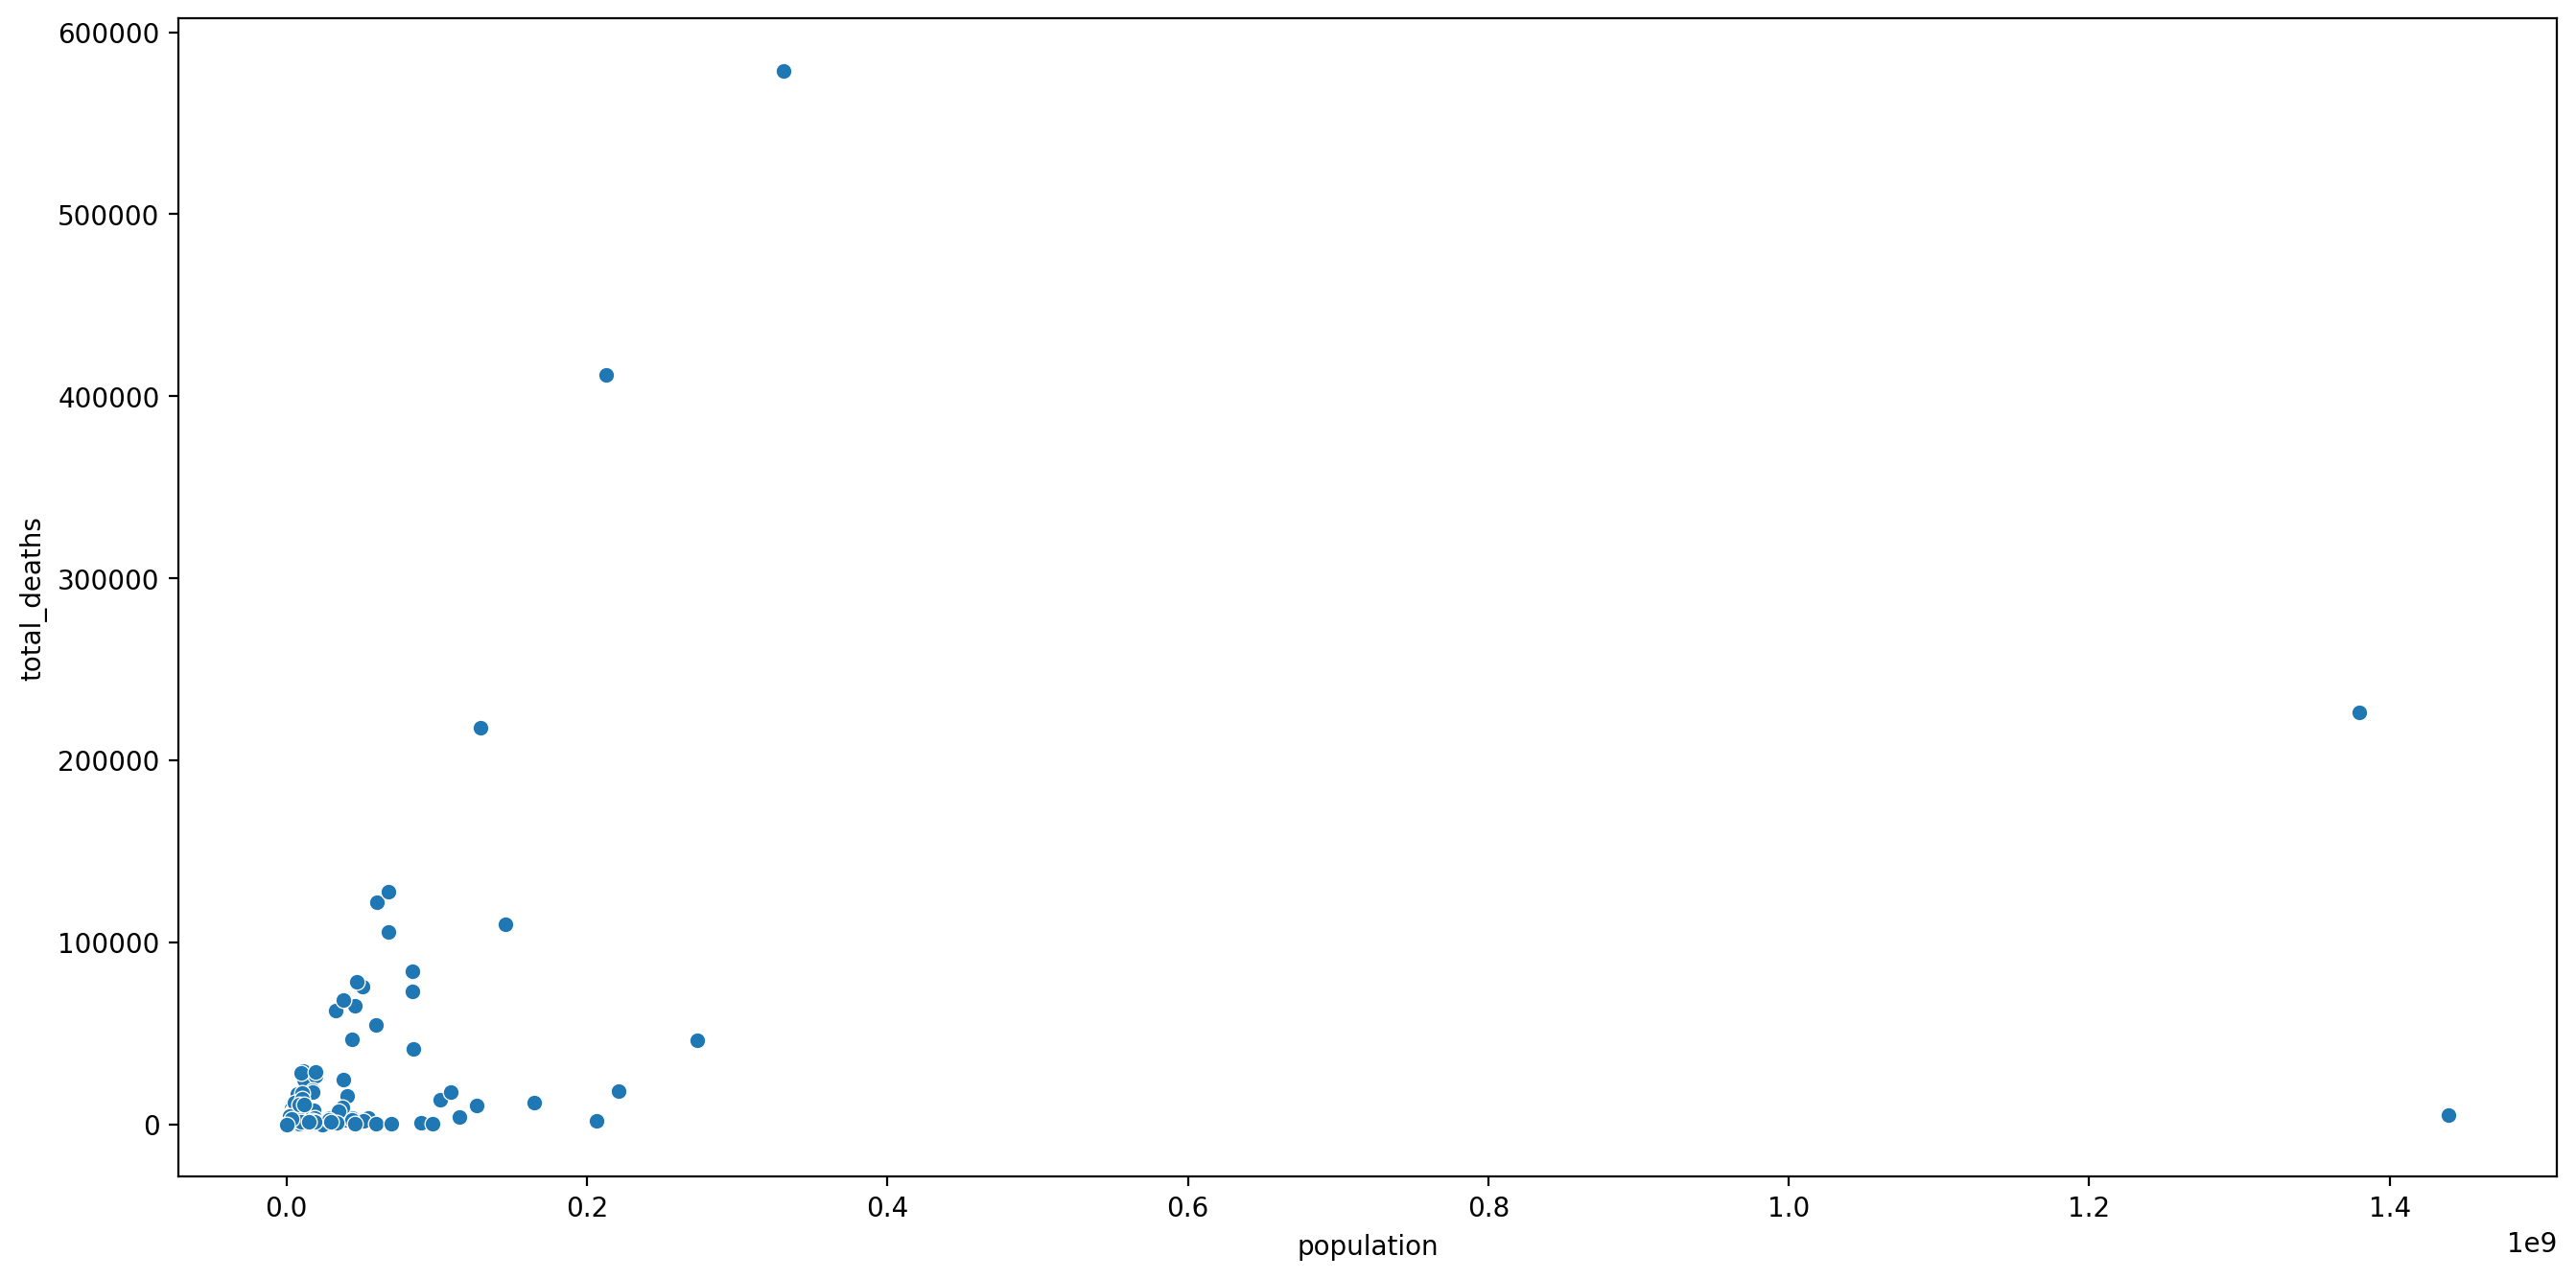

In [6]:
# RAW SCATTERPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.scatterplot(x="population", y="total_deaths", data=countries)
plt.gca().invert_yaxis()

plt.show();

In [7]:
# Removing CHI and IND since there populations are much larger than the rest of the world.
# Only Removing to get a clearer picture of the other countries
countries_exclude_chn_ind = countries.drop(["CHN", "IND"], axis=0)

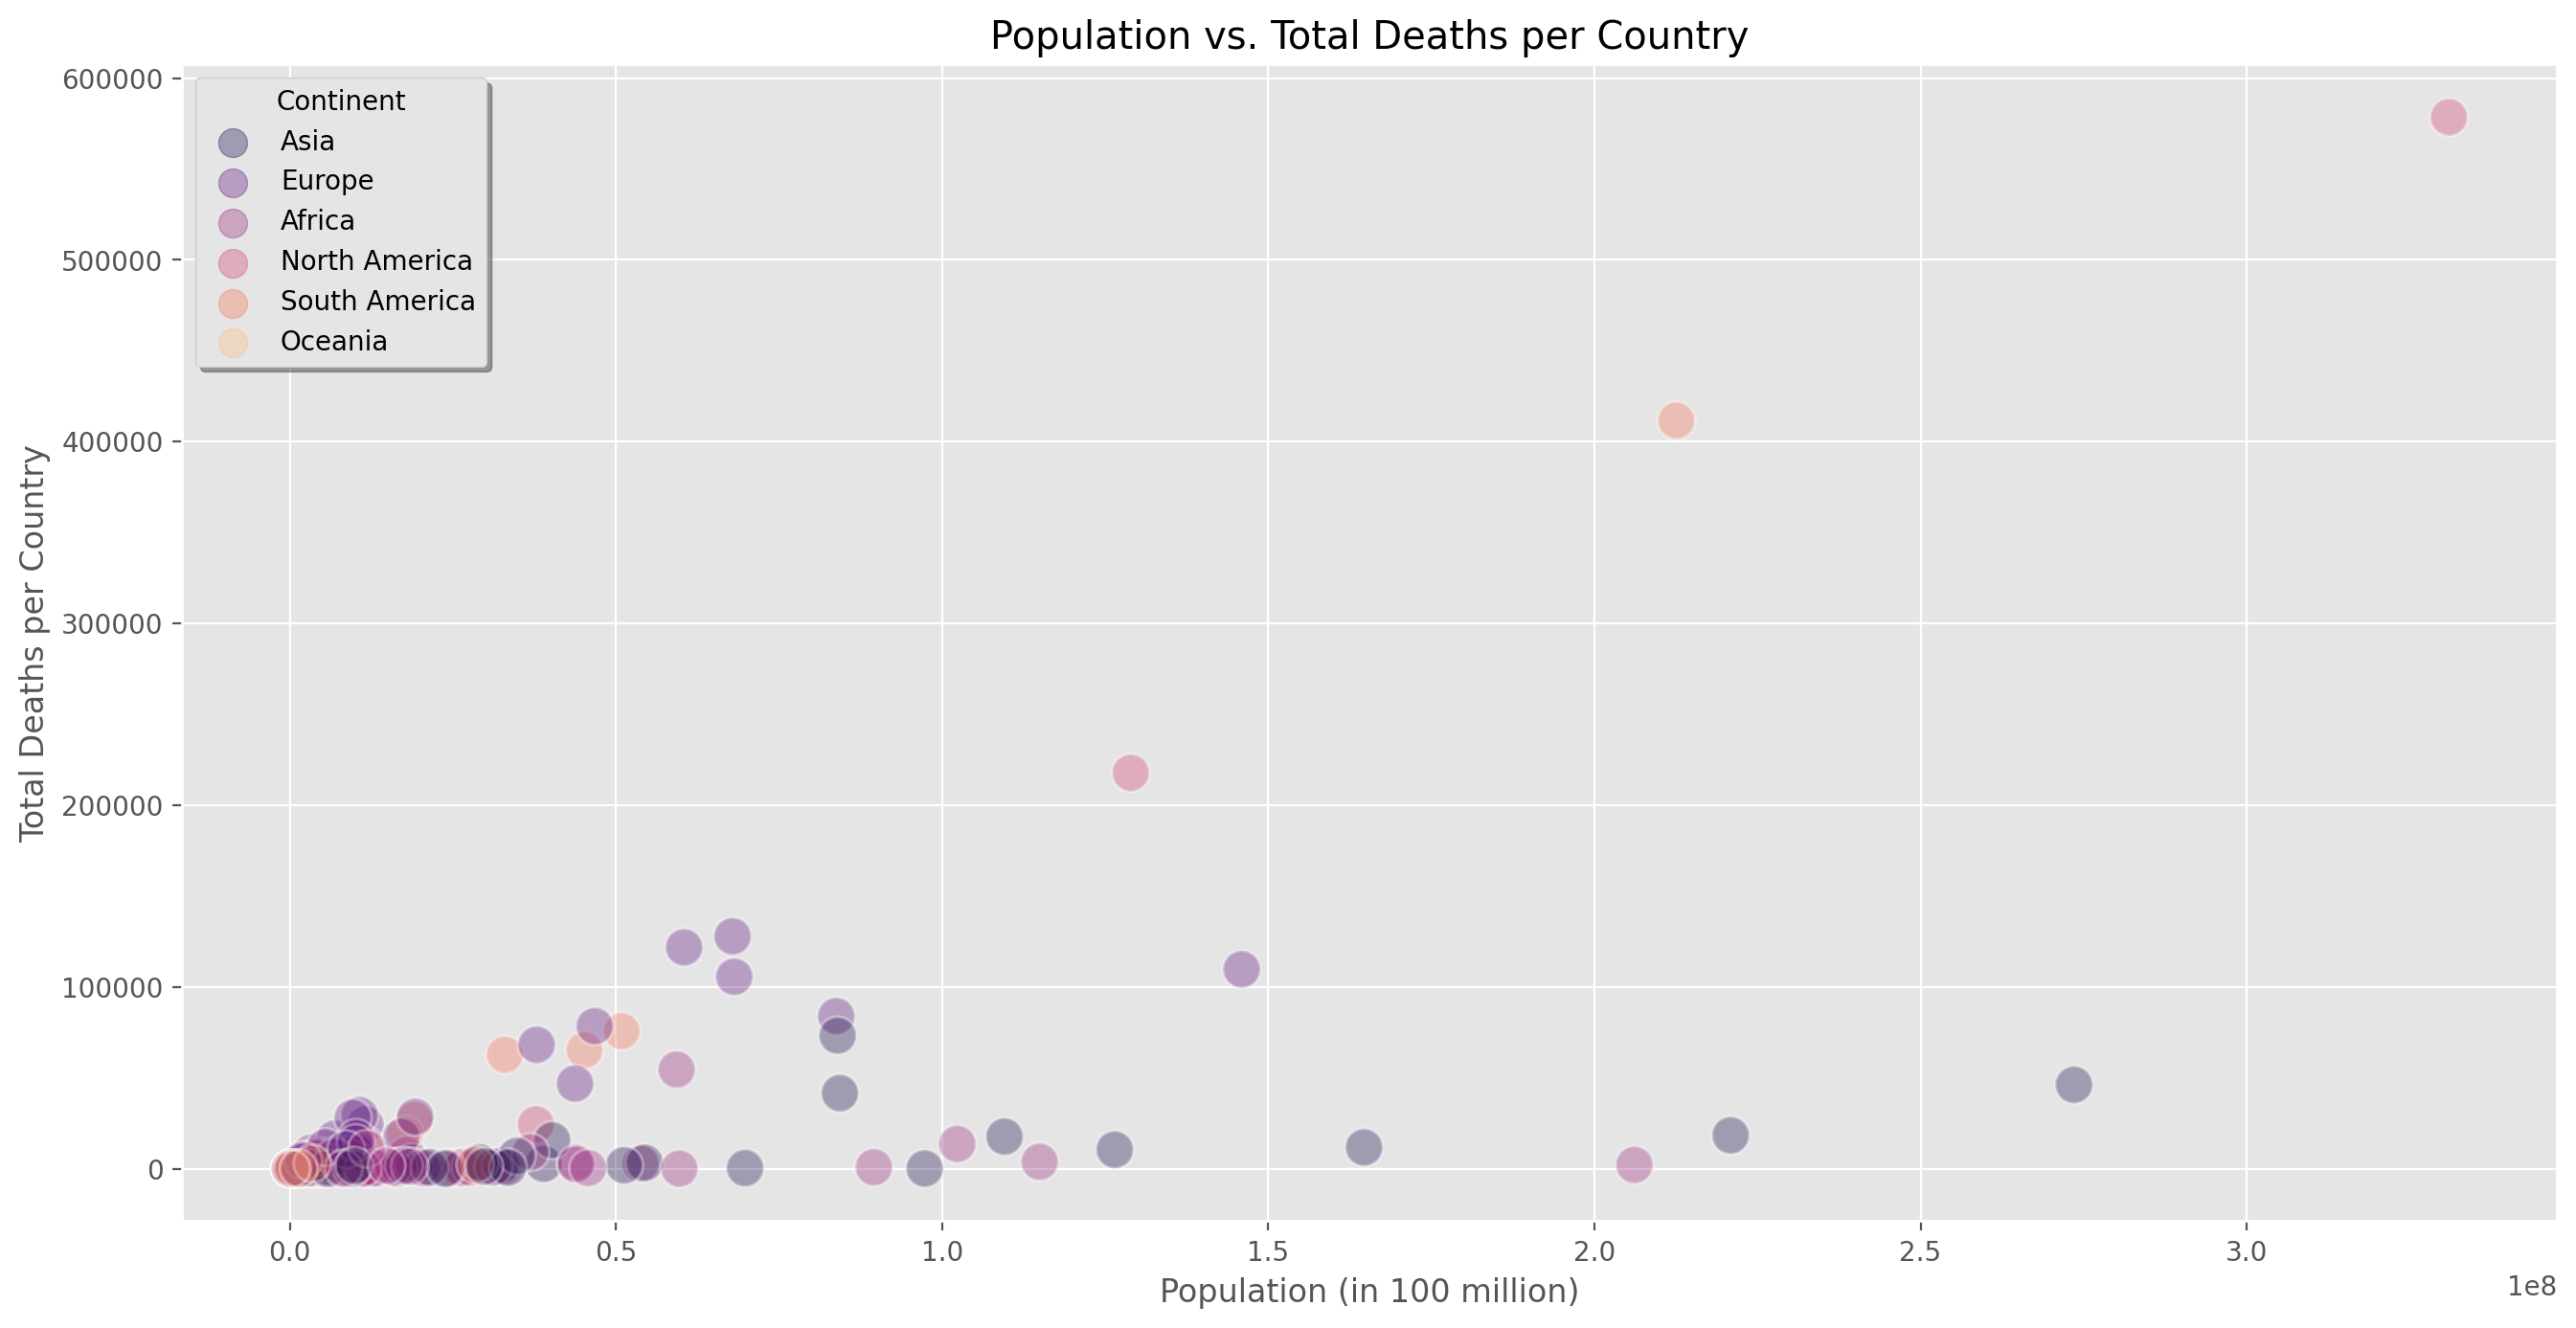

In [13]:
# REFINED SCATTERPLOT
plt.figure(figsize=(16, 8), dpi=200)
plt.style.use("ggplot")

scatter = sns.scatterplot(x="population", 
                y="total_deaths", 
                hue="continent",
                palette="magma",
                alpha=0.35,
                s=200, 
                data=countries_exclude_chn_ind)

plt.legend(title="Continent", 
           shadow=True, 
           markerscale=1.80)

for lh in scatter.legend_.legendHandles:
    lh.set_alpha(0.35)

plt.title("Population vs. Total Deaths per Country")
plt.xlabel("Population (in 100 million)")
plt.ylabel("Total Deaths per Country")
plt.gca().invert_yaxis()

plt.show();

## Boxplots Measuring Central Tendency of Deaths By Region
* Utilizing OWID entries and omitting individual countries
* ***NOTE:*** JSON contains entry called OWID_WRL which countries world data, when filtering data by region, (i.e OWID_SAM, OWID_NAM, etc) I noticed there was a slight discrepancy in the total population when summing the population over the regions. 
* ***OWID_WRL*** Pop: 7794800000
* Sum of ***OWID_AFR, OWID_ASI, OWID_EUR, OWID_NAM, OWID_OCE, OWID_SAM*** Pop: 7794635392.0
* Slight descrepancy between populations of 164,608

In [9]:
countries.dropna(axis=0, subset=["total_deaths"], inplace=True)

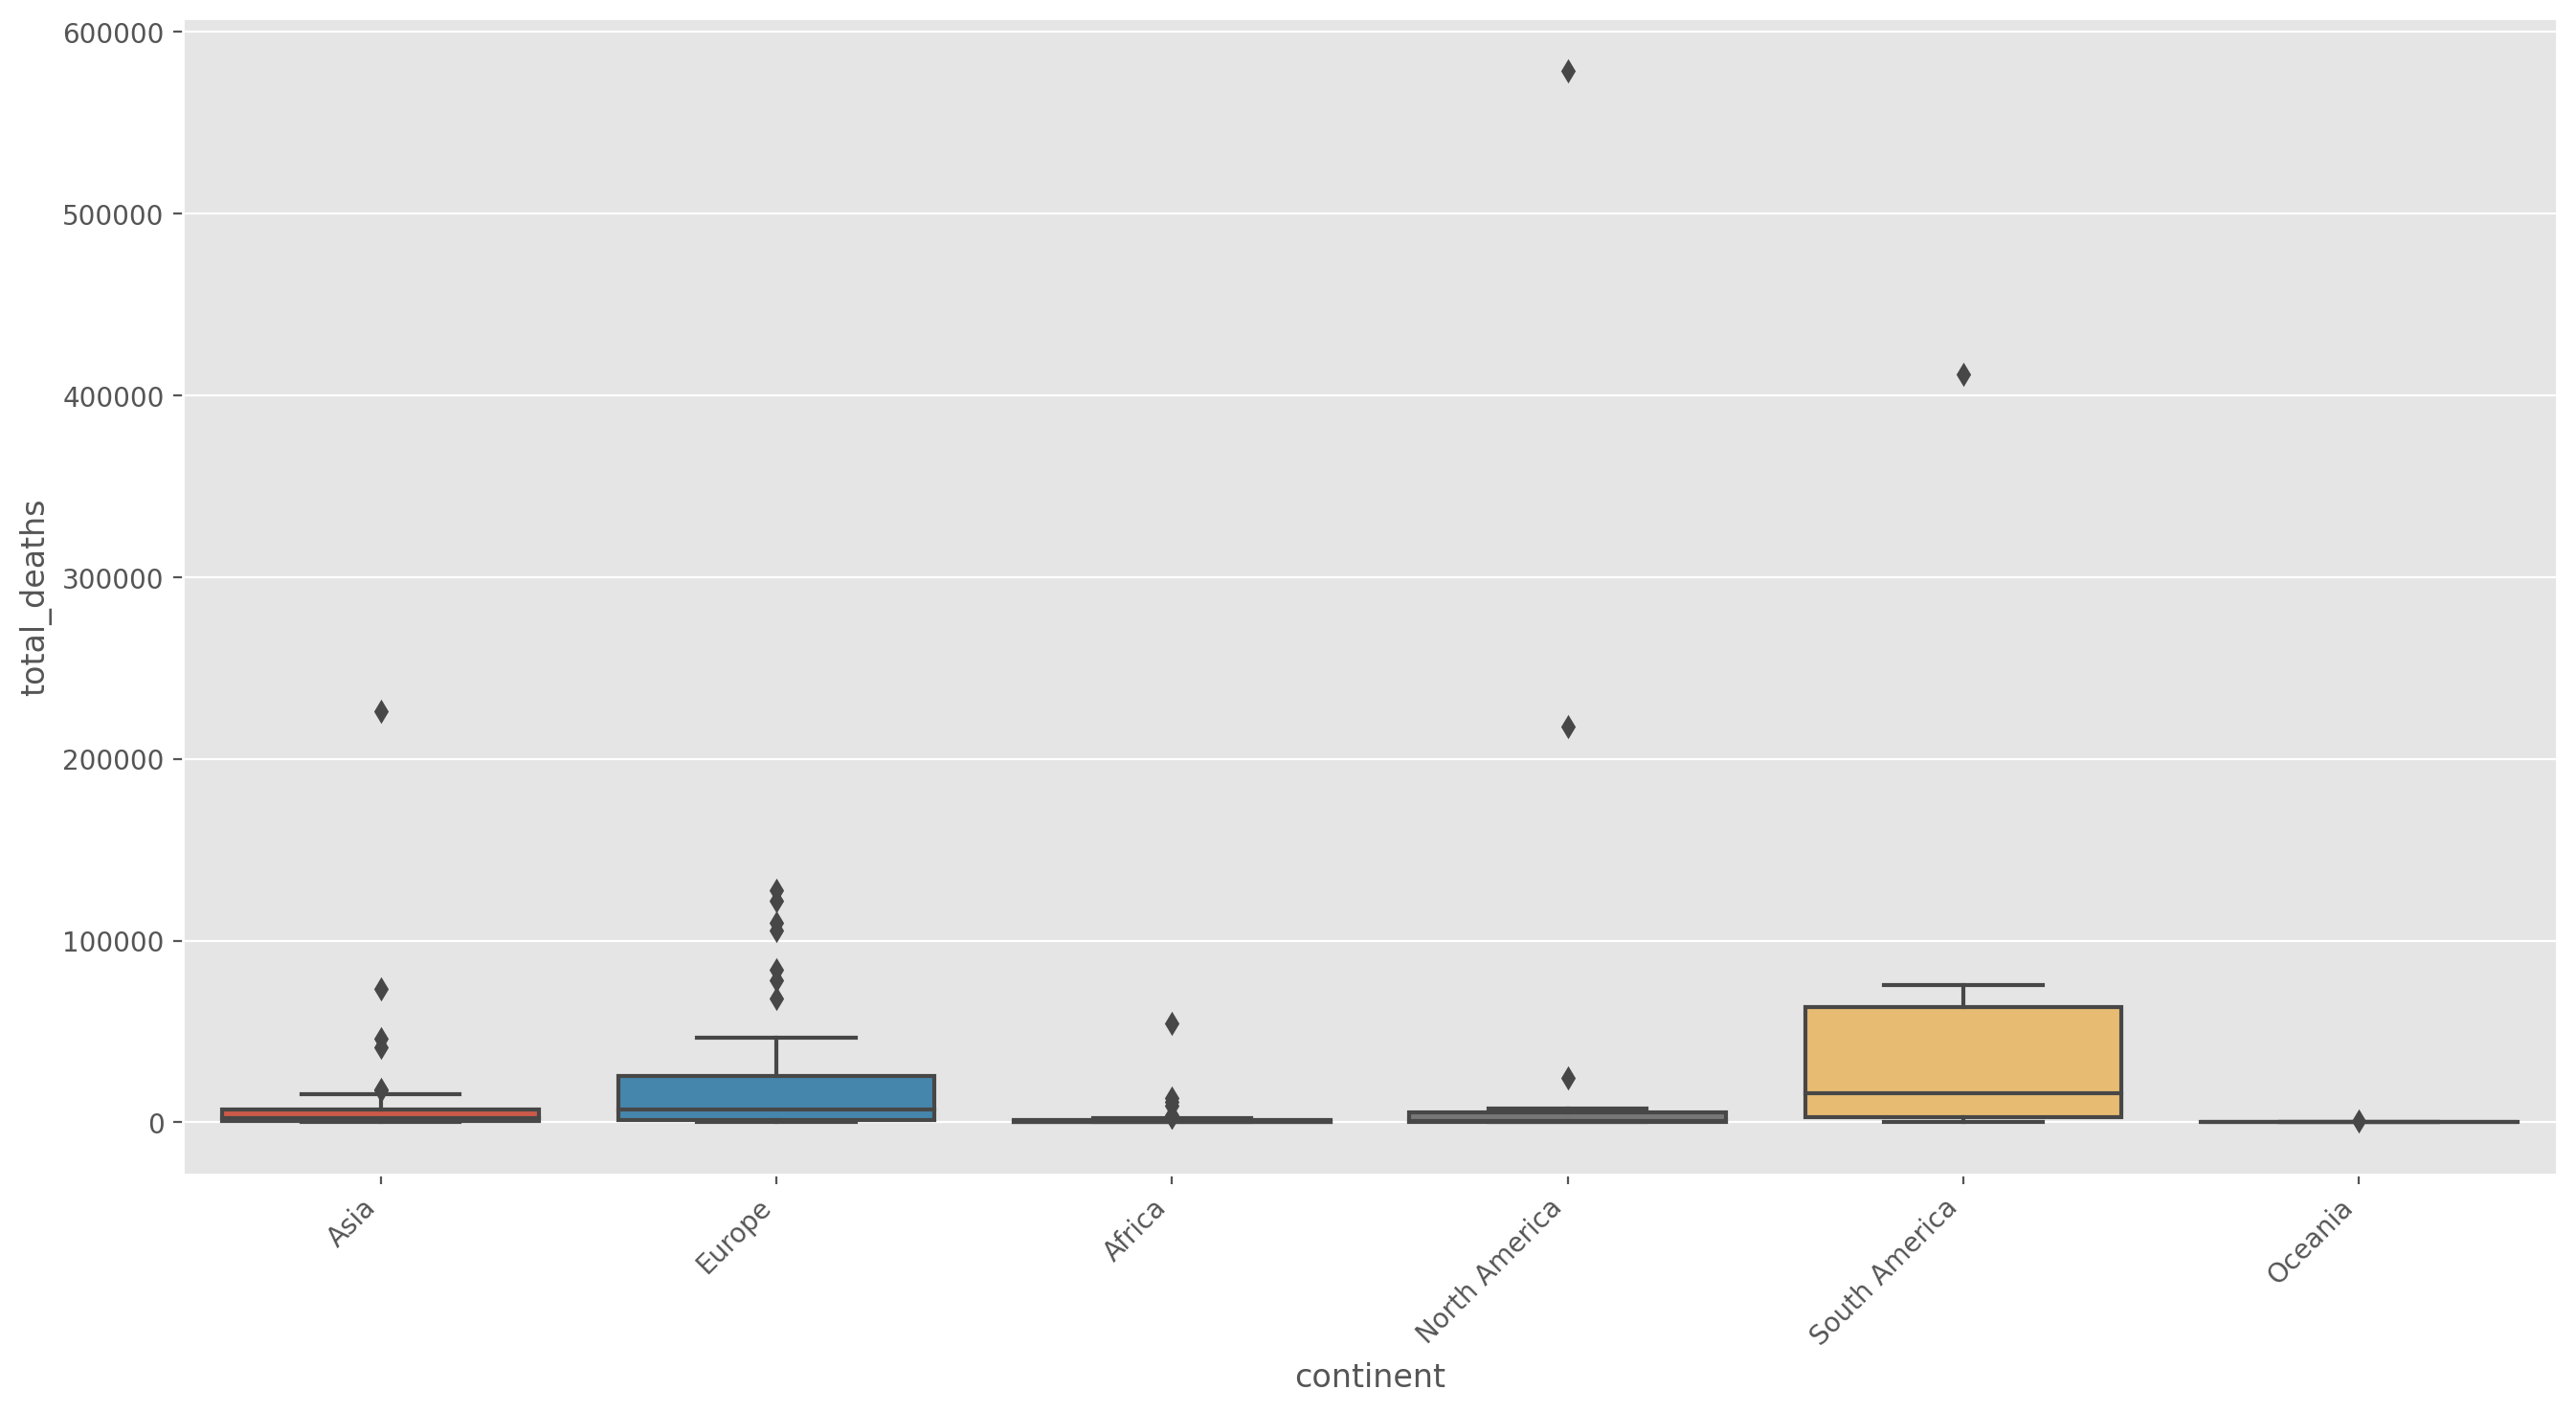

In [10]:
# RAW BOXPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=countries, x="continent", y="total_deaths", orient="v")
plt.xticks(rotation=45, ha="right")

plt.show();

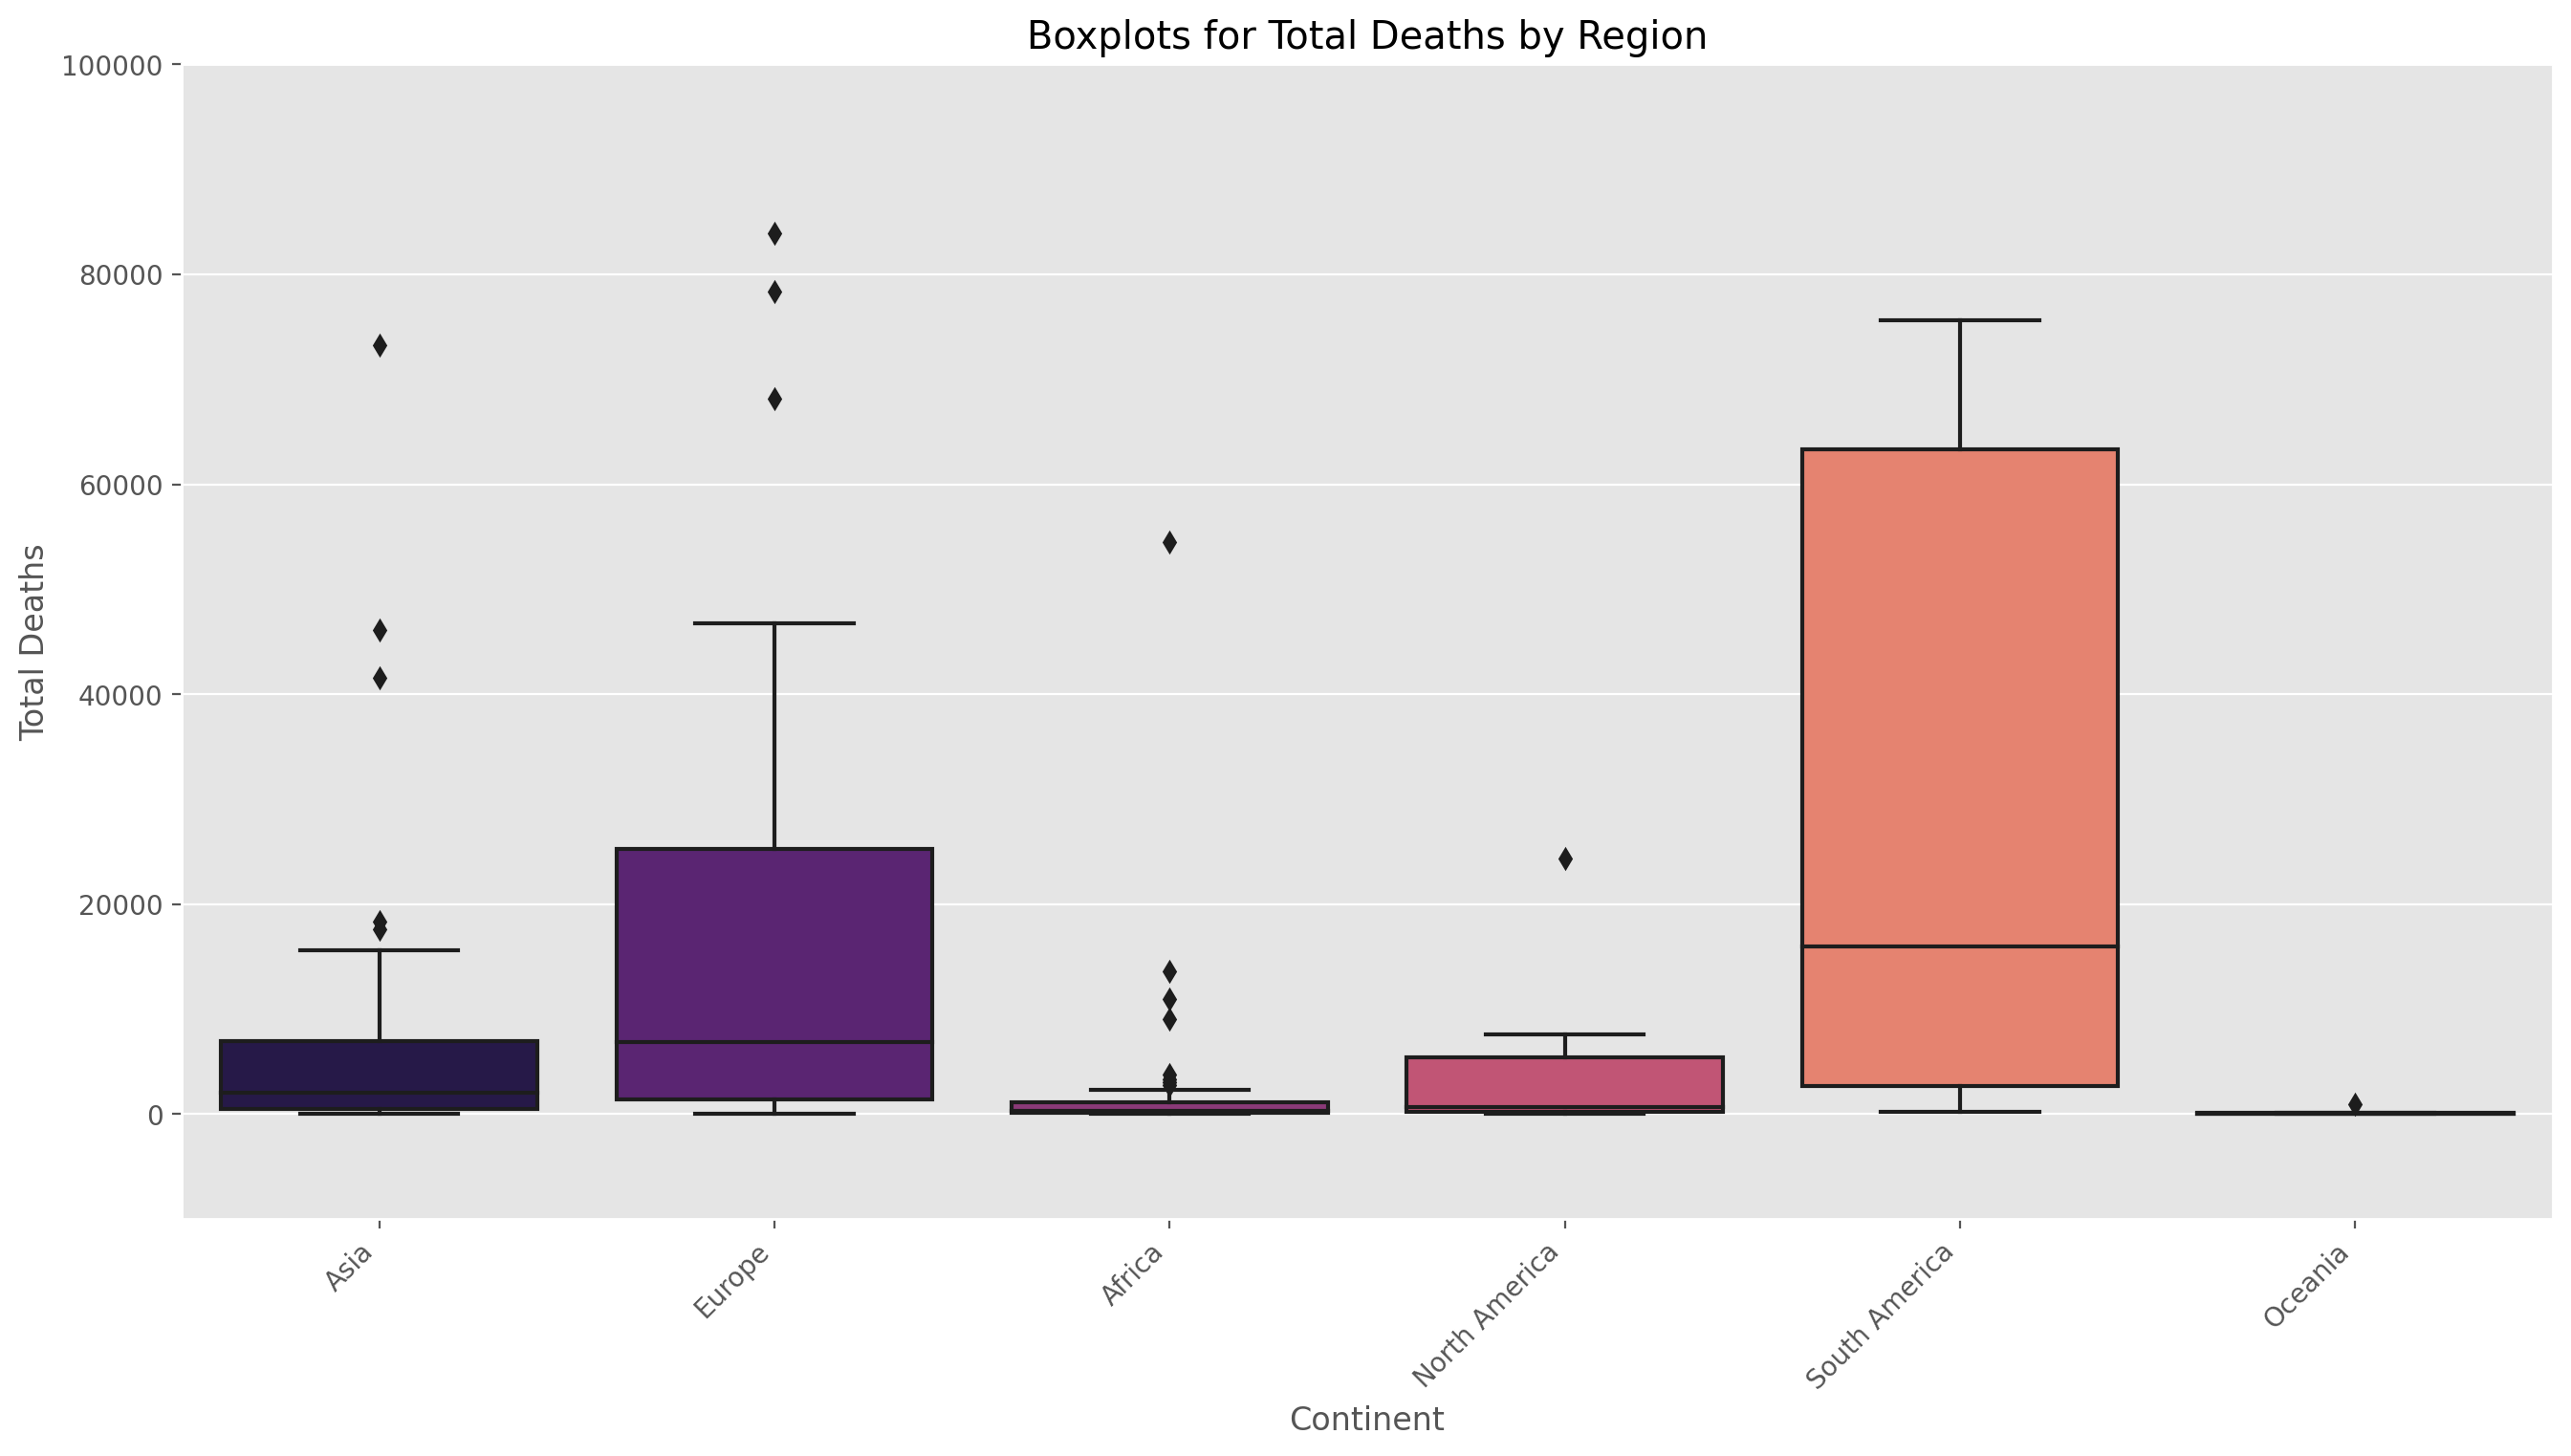

In [19]:
# Limiting y-axis to exclude major outliers
# REFINED BOXPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=countries, x="continent", y="total_deaths", palette="magma", orient="v")

plt.title("Boxplots for Total Deaths by Region")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.ylim(-10000, 100000)

plt.show();

## Case Study: Analyzing Relationships between Population Density and Total Cases

Let us see if there is a linear correlation between Population Density and Total Cases.

In [32]:
pop_cases = countries[["population_density", "total_cases"]].dropna(axis=0, subset=["population_density", "total_cases"])
pop_cases

,population_density,total_cases
AFG,54.422,60563
ALB,104.871,131327
DZA,17.348,122999
AND,163.755,13316
AGO,23.89,27284
...,...,...
VEN,36.253,201807
VNM,308.127,2995
YEM,53.508,6390
ZMB,22.995,91804


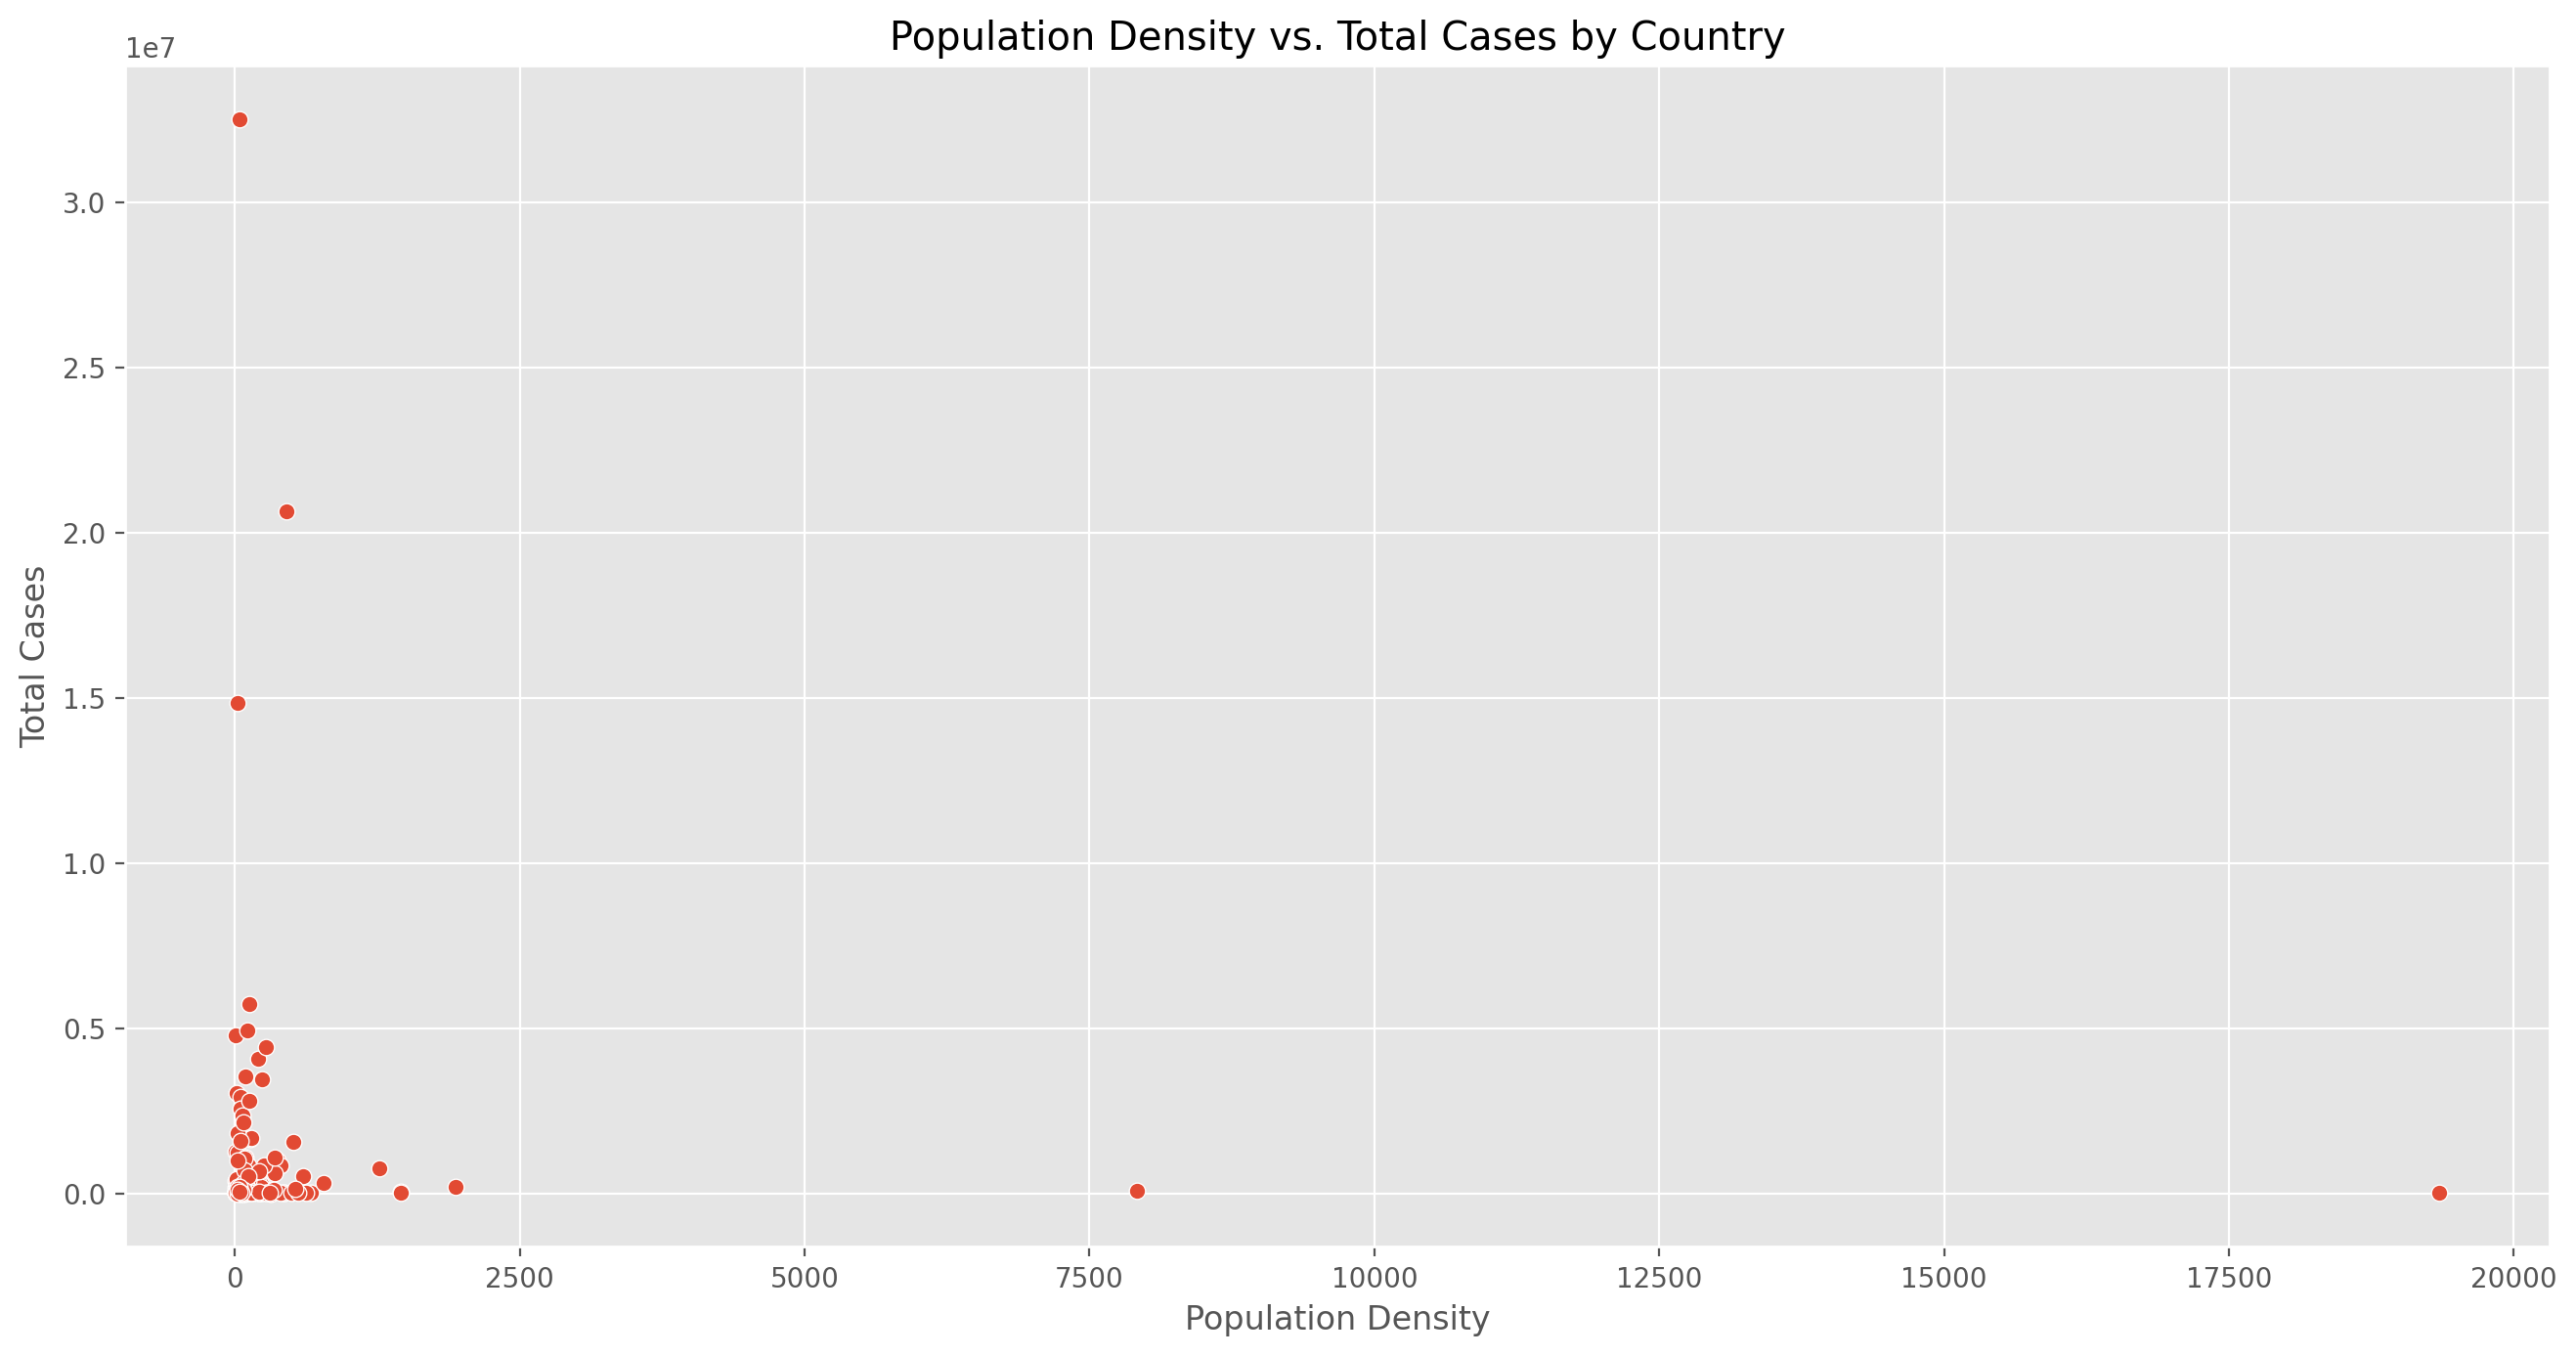

In [44]:
plt.figure(figsize=(16, 8), dpi=200)
sns.scatterplot(x="population_density", y="total_cases", data=pop_cases)

plt.title("Population Density vs. Total Cases by Country")
plt.xlabel("Population Density")
plt.ylabel("Total Cases")

plt.show()

It does not appear, visually, that there is any definitive relationship between Population Density and Total Cases, but we can use Scipy to calculate the Pearson Correlation Coefficient between these two features to reveal statistical insight. We can define a hypothesis test with the null and alternative hypothesis as follows:

$H_0:$ There is a linear correlation between Population Density and Total Cases.
<br/>
$H_A:$ There is no linear correlation between Population Density and Total Cases.

In [34]:
sp.stats.pearsonr(pop_cases.population_density, pop_cases.total_cases)

(-0.02767698362417579, 0.7138235793526161)

The correlation coefficient here is $r=-0.02767698362417579$ and the p-value is $p=0.7138235793526161$. The correlation coefficient implies that Population Density and Total Cases have a poor linear correlation. The p-value confirms this since it is much larger than $\alpha=0.05$ which is the commonly accepted threshold for significance levels. Therefore, we can conclude that sufficient evidence exists to support the claim that there is no linear correlation between population density and total cases. 

## Case Study: Analyzing Relationships between Total Vaccinations and Total Cases

Let us see if there is a linear correlation between Total Vaccinations and Total Cases.

In [40]:
vaccinations_cases = countries[["total_vaccinations", "total_cases"]].dropna(axis=0, subset=["total_vaccinations", "total_cases"])
vaccinations_cases

,total_vaccinations,total_cases
AFG,240000,60563
ALB,537387,131327
AND,28881,13316
AGO,456349,27284
ATG,29754,1232
...,...,...
URY,1.90353e+06,206946
UZB,600369,92320
VNM,585539,2995
ZMB,51784,91804


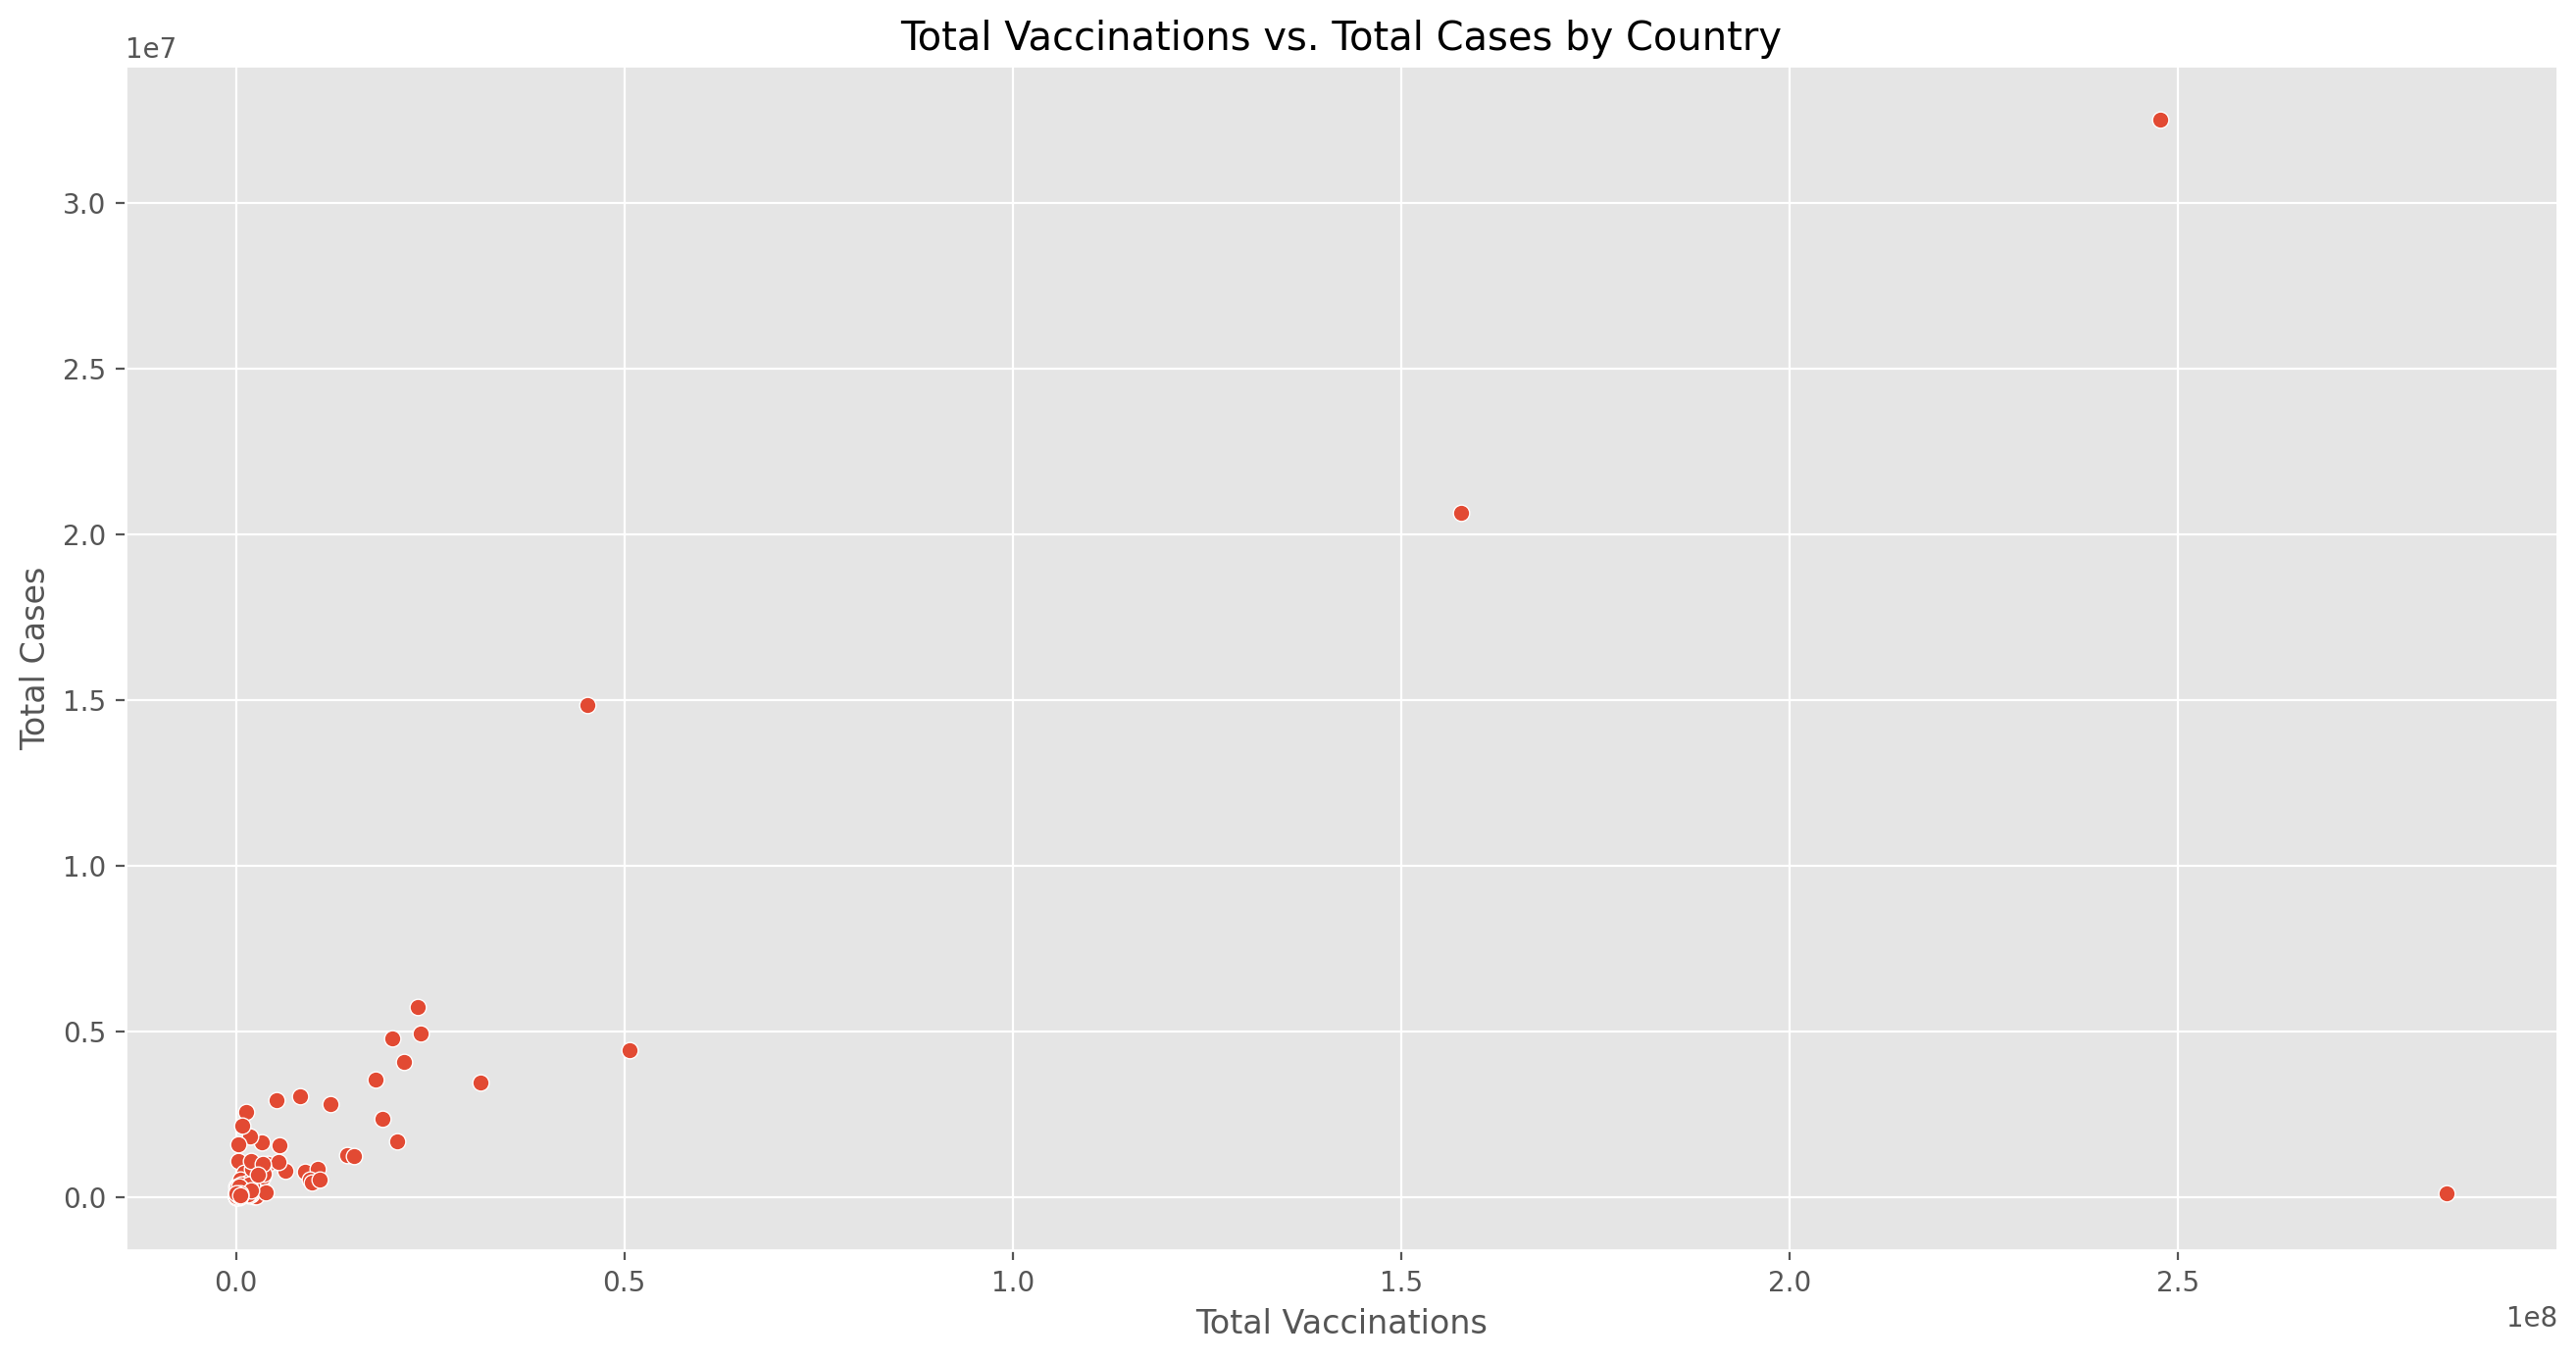

In [46]:
plt.figure(figsize=(16, 8), dpi=200)
sns.scatterplot(x="total_vaccinations", y="total_cases", data=vaccinations_cases)

plt.xlabel("Total Vaccinations")
plt.ylabel("Total Cases")
plt.title("Total Vaccinations vs. Total Cases by Country")

plt.show();

Although it is not completely clear, it appears that there is a positive linear correlation between Total Vaccinations and Total Cases, which is in some ways counterintuitive since we would expect Total Cases to diminsh as the population becomes vaccinated. We can follow the same steps as before and use Scipy to calculate statistical measures and design a formal hypothesis test with:

$H_0:$ There is a linear correlation between Total Vaccinations and Total Cases.
<br/>
$H_A:$ There is no linear correlation between Total Vaccinations and Total Cases.

In [45]:
sp.stats.pearsonr(vaccinations_cases.total_cases, vaccinations_cases.total_vaccinations)

(0.6913693206940721, 4.473426365817474e-21)

The correlation coefficient here is $r=0.6913693206940721$ and the p-value is $p=4.473426365817474\cdot10^{-21}$. The correlation coefficient implies that Population Density and Total Cases have a strong positive linear correlation. The p-value confirms this since it is much smaller than $\alpha=0.05$. Therefore, we can conclude that sufficient evidence does not exist to support the claim that there is no linear correlation between Total Vaccinations and Total Cases. 

## Further Analysis
It is worth noting that this relationship can be misinterpreted since the names of the features are quite indicative.